# 1. 강의영상 

{{<video ???? >}}

# 2. Imports

In [18]:
#!pip install autogluon.eda

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.model_selection
#---#
from autogluon.tabular import TabularPredictor
import autogluon.eda.auto as auto
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

In [20]:
np.random.randn(43052)
n_balance = 10 
toeic = np.random.randint(0,199,size=5000)*5
gpa = np.random.randint(100,450,size=5000)/100
u = toeic * 8/995 + gpa * 10/4.5
u = u - np.mean(u)
v = np.exp(u)/(1+np.exp(u))
employment = np.random.binomial(n=1,p=v)
df = pd.DataFrame({
'toiec':toeic,
'gpa':gpa,
'employment':employment
})
df_balance = pd.DataFrame((np.random.randn(5000,n_balance)).reshape(5000,n_balance)*1,columns = ['balance'+str(i) for i in range(n_balance)]) > 0
df = pd.concat([df,df_balance],axis=1).assign(employment = lambda df: df.employment.map({0:'No',1:'Yes'}))
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.7, random_state=42)

In [21]:
df_train

,toiec,gpa,employment,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9
4431,460,1.98,No,False,False,False,True,False,True,True,True,True,True
2162,940,3.70,Yes,True,False,True,True,True,True,True,False,False,False
2396,680,2.45,Yes,True,True,False,True,True,False,True,True,True,False
4768,55,3.59,No,False,False,True,False,False,False,True,True,False,False
2271,420,1.55,No,True,False,True,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,735,3.80,Yes,True,False,True,True,True,True,False,True,True,True
466,735,3.05,Yes,False,True,True,True,True,False,True,False,False,True
3092,10,3.59,No,False,False,False,True,False,True,False,False,False,False
3772,490,2.74,Yes,True,False,False,True,False,True,False,False,False,True


# 4. 적합 

In [22]:
# step1 -- pass
# step2 
predictr = TabularPredictor(label = 'employment')
# step3 
predictr.fit(df_train,num_gpus=1)
# step4 
yhat = predictr.predict(df_train)
yyhat = predictr.predict(df_test)

No path specified. Models will be saved in: "AutogluonModels/ag-20231201_083631/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231201_083631/"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #26~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Jul 13 16:27:29 UTC 2
Disk Space Avail:   248.57 GB / 490.57 GB (50.7%)
Train Data Rows:    1500
Train Data Columns: 12
Label Column: employment
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  ['No', 'Yes']
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = Yes, class 0 = No
	Note: For your binary classification, AutoGluon arbitrarily selected whi

In [23]:
predictr.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetTorch,0.850000,0.007131,2.457541,0.007131,2.457541,1,True,12
1,NeuralNetFastAI,0.850000,0.009152,1.720239,0.009152,1.720239,1,True,10
2,WeightedEnsemble_L2,0.850000,0.009814,2.204533,0.000662,0.484294,2,True,14
3,LightGBMXT,0.840000,0.001822,0.243193,0.001822,0.243193,1,True,3
4,XGBoost,0.840000,0.002539,0.490928,0.002539,0.490928,1,True,11
5,LightGBMLarge,0.836667,0.001348,0.356557,0.001348,0.356557,1,True,13
6,CatBoost,0.830000,0.001263,1.025847,0.001263,1.025847,1,True,7
7,LightGBM,0.826667,0.001327,0.175052,0.001327,0.175052,1,True,4
8,ExtraTreesEntr,0.826667,0.034885,0.350995,0.034885,0.350995,1,True,9
9,ExtraTreesGini,0.823333,0.034255,0.347509,0.034255,0.347509,1,True,8


# 5. 해석 및 시각화 

## A. y의 분포, (X,y)의 관계 시각화 

## Target variable analysis

,count,unique,top,freq,dtypes,missing_count,missing_ratio,raw_type,special_types
employment,1500,2,Yes,753,object,,,object,


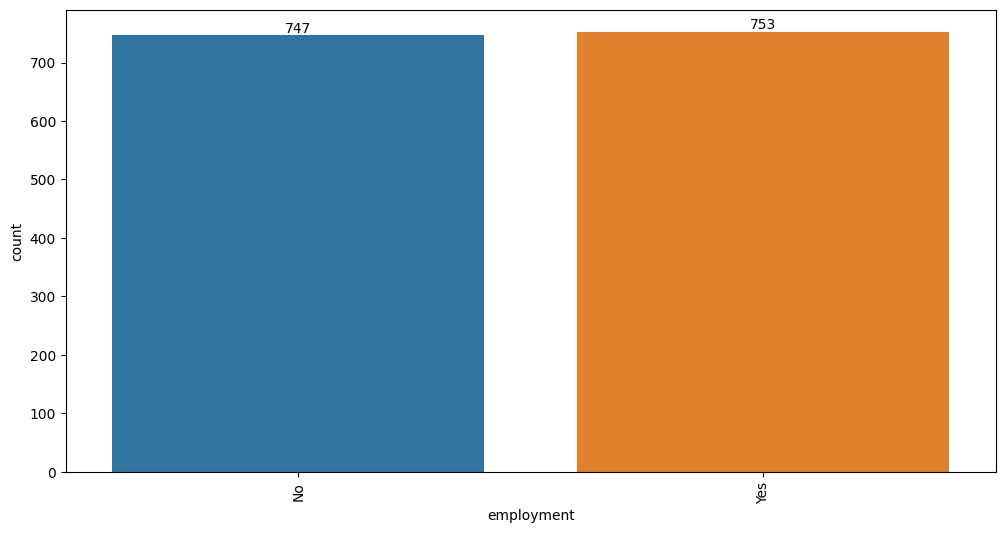

### Target variable correlations

**`train_data` - `spearman` correlation matrix; focus: absolute correlation for `employment` >= `0.5`**

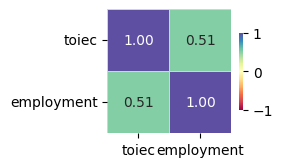

**Feature interaction between `toiec`/`employment` in `train_data`**

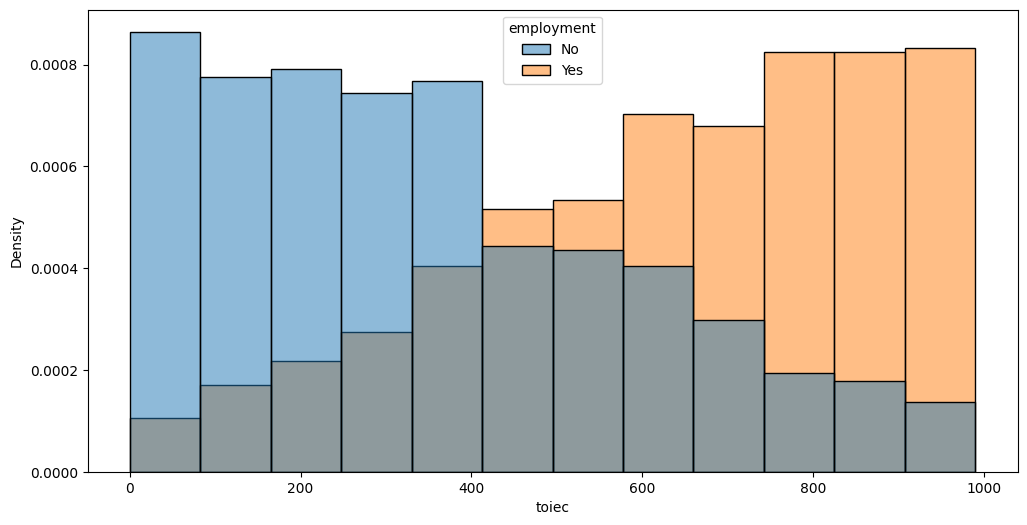

In [24]:
auto.target_analysis(
    train_data=df_train, 
    label='employment',
    fit_distributions=False
)

## B. 중요한 설명변수

No path specified. Models will be saved in: "AutogluonModels/ag-20231201_083641/"


### Model Prediction for employment

Using validation data for `Test` points

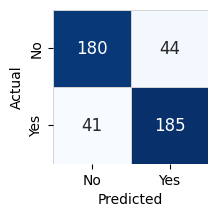

### Model Leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,0.811111,0.809524,0.000758,0.001052,0.161432,0.000758,0.001052,0.161432,1,True,1


### Feature Importance for Trained Model

,importance,stddev,p_value,n,p99_high,p99_low
gpa,0.184444,0.009813,9.578572e-07,5,0.204650,0.164239
toiec,0.180444,0.011590,2.031000e-06,5,0.204308,0.156581
balance5,0.004889,0.004554,3.716217e-02,5,0.014266,-0.004488
balance7,0.004444,0.005879,8.311638e-02,5,0.016550,-0.007661
balance3,0.002667,0.004818,1.417555e-01,5,0.012586,-0.007253
balance8,0.002222,0.005666,2.149867e-01,5,0.013888,-0.009443
balance2,0.001778,0.004275,2.025117e-01,5,0.010579,-0.007024
balance4,0.000889,0.003718,3.106541e-01,5,0.008545,-0.006768
balance6,0.000889,0.004037,3.241306e-01,5,0.009201,-0.007423
balance1,-0.000444,0.004818,5.766784e-01,5,0.009475,-0.010364


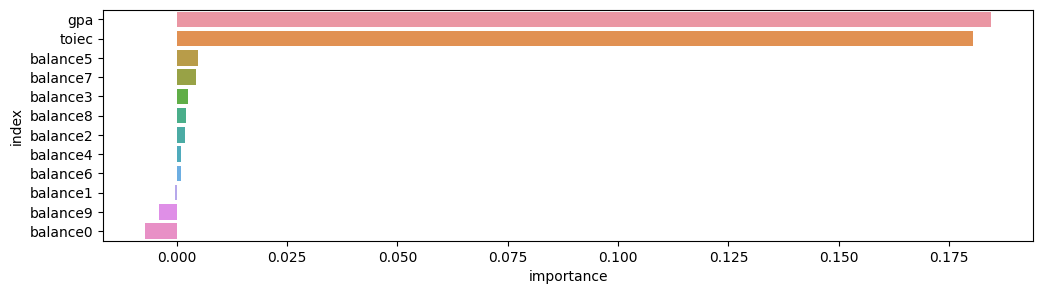

### Rows with the highest prediction error

Rows in this category worth inspecting for the causes of the error

,toiec,gpa,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9,employment,No,Yes,error
160,440,3.12,True,True,True,False,False,False,False,False,True,True,No,0.403186,0.596814,0.193628
223,870,3.02,False,True,False,True,False,False,False,False,True,True,No,0.405564,0.594436,0.188872
232,190,2.49,True,True,False,True,True,True,False,True,True,False,Yes,0.594199,0.405801,0.188399
722,315,4.03,True,True,False,False,True,False,False,False,True,True,No,0.406428,0.593572,0.187144
4187,610,3.91,True,False,True,True,True,True,True,True,False,False,No,0.413631,0.586369,0.172738
15,415,2.47,False,False,True,False,False,False,False,True,False,False,Yes,0.584466,0.415534,0.168932
750,305,2.63,False,False,False,False,False,True,True,False,False,False,Yes,0.580264,0.419736,0.160529
4276,555,3.58,False,False,False,False,False,False,False,False,False,True,No,0.421053,0.578947,0.157895
3863,345,2.43,True,False,False,True,True,False,False,True,True,False,Yes,0.575093,0.424907,0.150185
823,670,3.13,False,False,True,False,False,True,True,False,False,False,No,0.427126,0.572874,0.145748


### Rows with the least distance vs other class

Rows in this category are the closest to the decision boundary vs the other class and are good candidates for additional labeling

,toiec,gpa,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9,employment,No,Yes,error
2930,665,2.73,False,True,True,True,False,False,False,False,True,True,Yes,0.500071,0.499929,0.000142
3251,100,4.08,True,False,True,False,False,True,False,True,False,True,No,0.499858,0.500142,0.000283
3769,990,2.11,False,False,False,False,False,True,True,False,False,True,Yes,0.501805,0.498195,0.003611
2485,105,3.70,False,False,False,False,True,False,True,False,False,False,No,0.497379,0.502621,0.005243
2941,170,4.35,False,False,True,True,True,True,True,True,False,True,Yes,0.504219,0.495781,0.008438
1304,825,1.93,True,False,False,False,True,False,False,False,False,True,No,0.495184,0.504816,0.009633
2165,805,1.27,True,True,False,True,False,False,True,False,True,True,Yes,0.504844,0.495156,0.009689
2435,975,1.48,True,True,False,True,False,True,False,True,False,True,No,0.495000,0.505000,0.010000
1120,315,2.99,True,False,False,True,True,True,False,True,True,False,No,0.494613,0.505387,0.010775
4051,640,2.96,True,True,True,True,True,False,False,True,False,False,Yes,0.505709,0.494291,0.011418


In [25]:
auto.quick_fit(
    train_data = df_train, 
    label='employment',
    show_feature_importance_barplots=True
)

## C. 관측치별 해석 

`-` 0번관측치 

In [26]:
predictr.predict_proba(df_train.iloc[[0]])

,No,Yes
4431,0.793558,0.206442


,toiec,gpa,employment,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9
4431,460,1.98,No,0,0,0,1,0,1,1,1,1,1


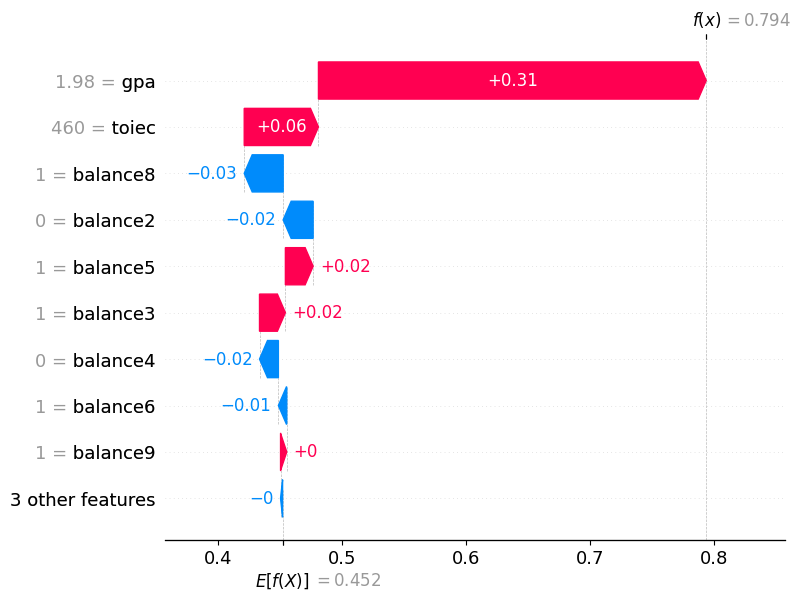

In [30]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    display_rows=True,
    plot='waterfall',
    rows=df_train.iloc[[0]]*1
)

In [ ]:
# 떨어진이유

`-` 1번관측치 

In [31]:
predictr.predict_proba(df_train.iloc[[1]])

,No,Yes
2162,0.006966,0.993034


,toiec,gpa,employment,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9
2162,940,3.7,Yes,1,0,1,1,1,1,1,0,0,0


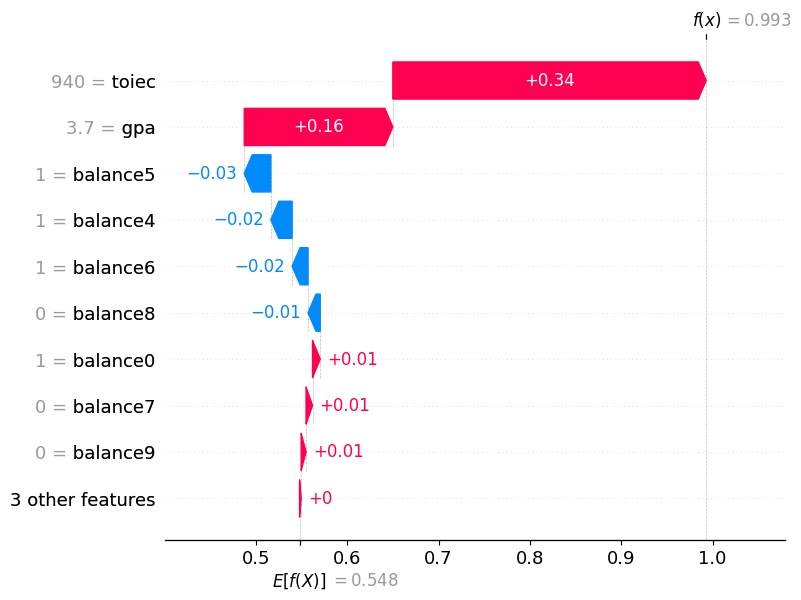

In [32]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    display_rows=True,
    plot='waterfall',
    rows=df_train.iloc[[1]]*1
)

In [29]:
# 합격한이유